<a href="https://colab.research.google.com/github/KeijiObara/alpinebot-team16/blob/master/short003_20190627.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 課題 6/27

## Wekaあるいはscikit-learnに付属しているサンプルデータからiris以外の適当なデータを選択し、クラス情報を削除するなど適当な処理を行ったうえで、クラスタリングを行い、結果を確認せよ。Wekaを用いた場合は結果をまとめたPDFファイルを作成し、scikit-learnを用いた場合はNotebookをPDFにしたものを作成せよ。

### ライブラリの読み込み

In [0]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering, KMeans, AffinityPropagation
from sklearn.decomposition import PCA

## digitデータを読み込む


1.   データを読み込む
2.   一部を表示して確認



In [0]:
from sklearn.datasets import load_digits
digits = load_digits()
Xd = digits.data
Xd[1:10]

array([[ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
        15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
         0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
        16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.],
       [ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.,  0.,  0.,  3., 16., 15.,
        14.,  0.,  0.,  0.,  0.,  8., 13.,  8., 16.,  0.,  0.,  0.,  0.,
         1.,  6., 15., 11.,  0.,  0.,  0.,  1.,  8., 13., 15.,  1.,  0.,
         0.,  0.,  9., 16., 16.,  5.,  0.,  0.,  0.,  0.,  3., 13., 16.,
        16., 11.,  5.,  0.,  0.,  0.,  0.,  3., 11., 16.,  9.,  0.],
       [ 0.,  0.,  7., 15., 13.,  1.,  0.,  0.,  0.,  8., 13.,  6., 15.,
         4.,  0.,  0.,  0.,  2.,  1., 13., 13.,  0.,  0.,  0.,  0.,  0.,
         2., 15., 11.,  1.,  0.,  0.,  0.,  0.,  0.,  1., 12., 12.,  1.,
         0.,  0.,  0.,  0.,  0.,  1., 10.,  8.,  0.,  0.,  

##次元削減してデータをプロットしてみる

In [0]:
pcad = PCA(n_components=2)
Xd2 = pcad.fit_transform(Xd)

データをプロット

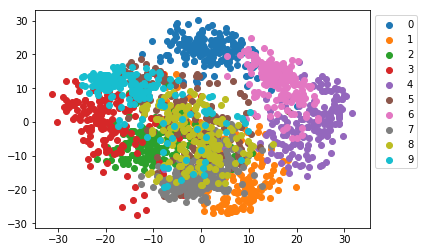

In [0]:
yd2 = digits.target
for t in set(yd2):
    plt.scatter(Xd2[yd2==t,0], Xd2[yd2==t,1], label=digits.target_names[t])
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

## 階層的クラスタリング

AgglomerativeClusteringを用いて階層的クラスタリングを行います。0～9の数字データなのでクラスタ数が10になったところで処理を止めます。

In [0]:
acd=AgglomerativeClustering(n_clusters=10)
acd.fit(Xd)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=10,
                        pooling_func='deprecated')

acdインスタンスのlabels_属性を表示してクラスタリング結果を確認します。

In [0]:
acd.labels_

array([7, 9, 4, ..., 4, 1, 4])

散布図をプロットして結果を確認します。

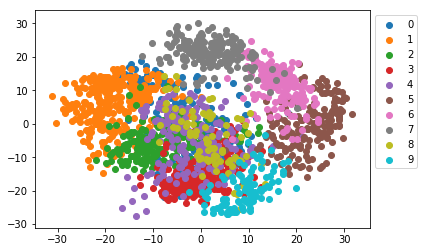

In [0]:
yd = acd.labels_
for t in set(yd):
    plt.scatter(Xd2[yd==t,0], Xd2[yd==t,1], label=t)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

## k-meansクラスタリング

KMeansを用いて分割最適化クラスタリングを行います。クラスタ数10を予め与えておきます。

In [0]:
kmd = KMeans(n_clusters = 10)
kmd.fit(Xd)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

kmdインスタンスのlabels_属性を表示してクラスタリング結果を確認します。

In [0]:
kmd.labels_

array([4, 2, 2, ..., 2, 3, 3], dtype=int32)

散布図をプロットして結果を確認します。

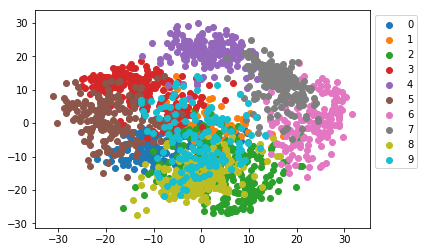

In [0]:
yd = kmd.labels_
for t in set(yd):
    plt.scatter(Xd2[yd==t,0], Xd2[yd==t,1], label=t)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

## クラスタ数決定の自動化 Affinity Propagation

AffinityPropagationはすべてのノード間で「類似度」と「クラスタ中心になりやすさ」の情報を交換しながらクラスタリングを行う手法です。クラスタ数（すなわちクラスタ中心の数）を事前に決める必要はありません。

In [0]:
apd = AffinityPropagation()
apd.fit(Xd)

AffinityPropagation(affinity='euclidean', convergence_iter=15, copy=True,
                    damping=0.5, max_iter=200, preference=None, verbose=False)

apdインスタンスのclustercenters\属性の値は、クラスタ中心のリストです。

In [0]:
apd.cluster_centers_

array([[ 0.,  0.,  0., ..., 11.,  3.,  0.],
       [ 0.,  1.,  8., ...,  2.,  0.,  0.],
       [ 0.,  0.,  0., ..., 14.,  7.,  0.],
       ...,
       [ 0.,  1.,  9., ...,  4.,  0.,  0.],
       [ 0.,  0.,  8., ...,  7.,  0.,  0.],
       [ 0.,  0.,  0., ...,  9.,  0.,  0.]])

散布図をプロットして結果を確認します。

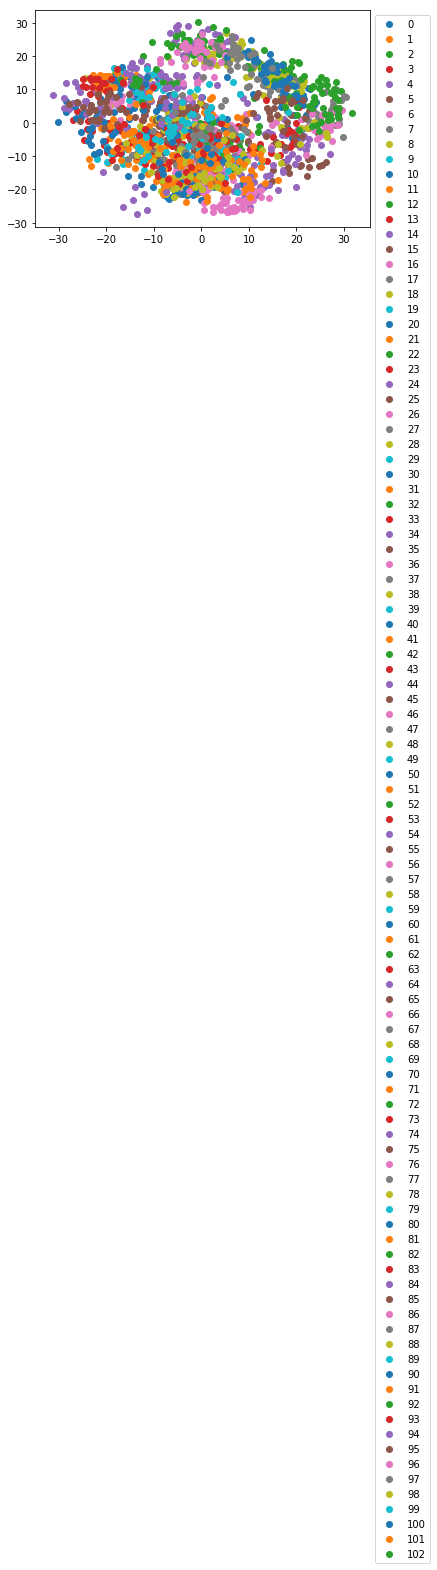

In [0]:
yd = apd.labels_
for t in set(yd):
    plt.scatter(Xd2[yd==t,0], Xd2[yd==t,1], label=t)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

### Wineデータを読み込む
1.   データの読み込み
2.   一部の表示 


In [0]:
from sklearn.datasets import load_wine
wine = load_wine()
Xw = wine.data
Xw[1:10]

array([[1.320e+01, 1.780e+00, 2.140e+00, 1.120e+01, 1.000e+02, 2.650e+00,
        2.760e+00, 2.600e-01, 1.280e+00, 4.380e+00, 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, 1.860e+01, 1.010e+02, 2.800e+00,
        3.240e+00, 3.000e-01, 2.810e+00, 5.680e+00, 1.030e+00, 3.170e+00,
        1.185e+03],
       [1.437e+01, 1.950e+00, 2.500e+00, 1.680e+01, 1.130e+02, 3.850e+00,
        3.490e+00, 2.400e-01, 2.180e+00, 7.800e+00, 8.600e-01, 3.450e+00,
        1.480e+03],
       [1.324e+01, 2.590e+00, 2.870e+00, 2.100e+01, 1.180e+02, 2.800e+00,
        2.690e+00, 3.900e-01, 1.820e+00, 4.320e+00, 1.040e+00, 2.930e+00,
        7.350e+02],
       [1.420e+01, 1.760e+00, 2.450e+00, 1.520e+01, 1.120e+02, 3.270e+00,
        3.390e+00, 3.400e-01, 1.970e+00, 6.750e+00, 1.050e+00, 2.850e+00,
        1.450e+03],
       [1.439e+01, 1.870e+00, 2.450e+00, 1.460e+01, 9.600e+01, 2.500e+00,
        2.520e+00, 3.000e-01, 1.980e+00, 5.250e+00, 1.020e+00, 3.580e+00,
        1.29

## 次元削減をしてデータをプロットしてみる

In [0]:
pcaw = PCA(n_components=2)
Xw2 = pcaw.fit_transform(Xw)

正解データのプロット

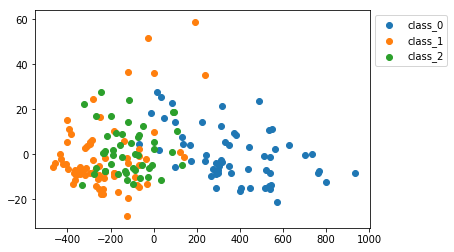

In [0]:
yw2 = wine.target
for t in set(yw2):
    plt.scatter(Xw2[yw2==t,0], Xw2[yw2==t,1], label=wine.target_names[t])
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

## 階層的クラスタリング

AgglomerativeClusteringを用いて階層的クラスタリングを行います。クラスタ数が3になったところで処理を止めます。

In [0]:
acw=AgglomerativeClustering(n_clusters=3)
acw.fit(Xw)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=3,
                        pooling_func='deprecated')

acwインスタンスのlabels_属性を表示してクラスタリング結果を確認します。

In [0]:
acw.labels_

array([0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 1, 2,
       1, 1, 2, 2, 2, 1, 1, 0, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1,
       2, 2, 1, 1, 1, 1, 1, 0, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2,
       2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1])

散布図をプロットして結果を確認します。

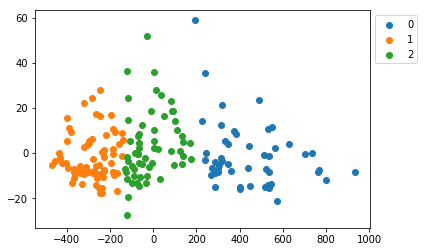

In [0]:
yw = acw.labels_
for t in set(yw):
    plt.scatter(Xw2[yw==t,0], Xw2[yw==t,1], label=t)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

## k-meansクラスタリング

KMeansを用いて分割最適化クラスタリングを行います。クラスタ数3は予め与えておく必要があります。

In [0]:
kmw = KMeans(n_clusters = 3)
kmw.fit(Xw)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

kmインスタンスのlabels_属性を表示してクラスタリング結果を確認します。

In [0]:
kmw.labels_

array([1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 0, 0, 2,
       0, 0, 2, 2, 2, 0, 0, 1, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2,
       2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0], dtype=int32)

散布図をプロットして結果を確認します。

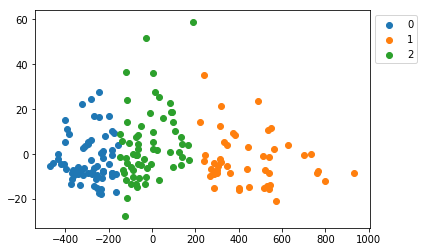

In [0]:
yw = kmw.labels_
for t in set(yw):
    plt.scatter(Xw2[yw==t,0], Xw2[yw==t,1], label=t)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

## クラスタ数決定の自動化 Affinity Propagation

AffinityPropagationはすべてのノード間で「類似度」と「クラスタ中心になりやすさ」の情報を交換しながらクラスタリングを行う手法です。クラスタ数（すなわちクラスタ中心の数）を事前に決める必要はありません。

In [0]:
apw = AffinityPropagation()
apw.fit(Xw)

AffinityPropagation(affinity='euclidean', convergence_iter=15, copy=True,
                    damping=0.5, max_iter=200, preference=None, verbose=False)

apインスタンスのclustercenters\属性の値は、クラスタ中心のリストです。

In [0]:
apw.cluster_centers_

array([[1.358e+01, 1.660e+00, 2.360e+00, 1.910e+01, 1.060e+02, 2.860e+00,
        3.190e+00, 2.200e-01, 1.950e+00, 6.900e+00, 1.090e+00, 2.880e+00,
        1.515e+03],
       [1.305e+01, 1.770e+00, 2.100e+00, 1.700e+01, 1.070e+02, 3.000e+00,
        3.000e+00, 2.800e-01, 2.030e+00, 5.040e+00, 8.800e-01, 3.350e+00,
        8.850e+02],
       [1.438e+01, 3.590e+00, 2.280e+00, 1.600e+01, 1.020e+02, 3.250e+00,
        3.170e+00, 2.700e-01, 2.190e+00, 4.900e+00, 1.040e+00, 3.440e+00,
        1.065e+03],
       [1.329e+01, 1.970e+00, 2.680e+00, 1.680e+01, 1.020e+02, 3.000e+00,
        3.230e+00, 3.100e-01, 1.660e+00, 6.000e+00, 1.070e+00, 2.840e+00,
        1.270e+03],
       [1.208e+01, 2.080e+00, 1.700e+00, 1.750e+01, 9.700e+01, 2.230e+00,
        2.170e+00, 2.600e-01, 1.400e+00, 3.300e+00, 1.270e+00, 2.960e+00,
        7.100e+02],
       [1.277e+01, 3.430e+00, 1.980e+00, 1.600e+01, 8.000e+01, 1.630e+00,
        1.250e+00, 4.300e-01, 8.300e-01, 3.400e+00, 7.000e-01, 2.120e+00,
        3.72

散布図をプロットして結果を確認します。

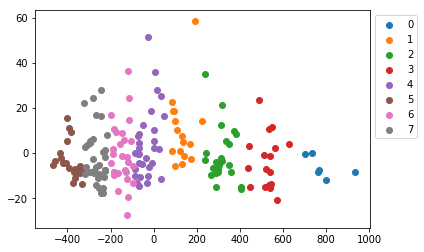

In [0]:
yw = apw.labels_
for t in set(yw):
    plt.scatter(Xw2[yw==t,0], Xw2[yw==t,1], label=t)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

## 考察
digitsデータとwineデータでクラスタリングを行って、次元削減したうえで散布図をプロットして確認した。
散布図から見るとK-meansクラスタリングが一番よく分類できているといえる。
また、Affinity Propagationでは分類しすぎる傾向が見て取れた。